# T-тесты

**В этом нотбуке рассмотрим тест Шапиро-Уилка и t-test на примере данных**

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

In [20]:
# Загрузим набор данных из 1254 значений ежедневных изменения индекса S&P 500
df = pd.read_csv('SP_500_returns.csv', delimiter=';')
df.head(3)

,Date,Return_SP_500
0,02.12.2014,0.006384
1,03.12.2014,0.003765
2,04.12.2014,-0.001162


In [67]:
data = df['Return_SP_500'].dropna()

mu, sigma = data.mean(), data.std(ddof=1)
dist = stats.norm(mu, sigma)

**Проверяем гипотезу о нормальности распределения** \
_Воспользуемся тестом Шапиро-Уилка_ \
Нулевая гипотеза (H₀): распределение является нормальным. \
Альтернативная гипотеза (H₁): распределение отличается от нормального.

In [68]:
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f'Значение p-value: {shapiro_p}')
print(f'Можем отвергнуть нулевую гипотезу о нормальности распределения: {shapiro_p < 0.05}')

Значение p-value: 9.18084680114666e-22
Можем отвергнуть нулевую гипотезу о нормальности распределения: True


Как мы убедились p-value меньше уровня значимости α=0.05, поэтому мы отвергаем нулевую гипотезу
***
_Центральная Предельная Теорема (ЦПТ): При достаточно большом размере выборки распределение среднего
стремится к нормальному независимо от распределения данных._
### Одновыборочный t-тест

**Проведем одновыборочный t-тест о равенстве математического ожидания значений изменения индекса S&P 500 значению 0.00087** \
Сформулируем нулевую гипотезу: \
Нулевая гипотеза (H₀): μ=0.00087 \
Альтернативная гипотеза (H₁): μ≠0.00087 (двухсторонняя гипотеза, т.е. предполагаем, что  возможны отклонения как в большую, так и в меньшую сторону)
<br>
_* Перед применением t-теста визуально оценим распределение данных. Несмотря на отклонение от нормальности (тест Шапиро-Уилка), размер выборки достаточно велик (1254 значения), чтобы использовать t-тест в силу центральной предельной теоремы._

Text(0.5, 1.0, 'Q–Q plot доходностей S&P 500')

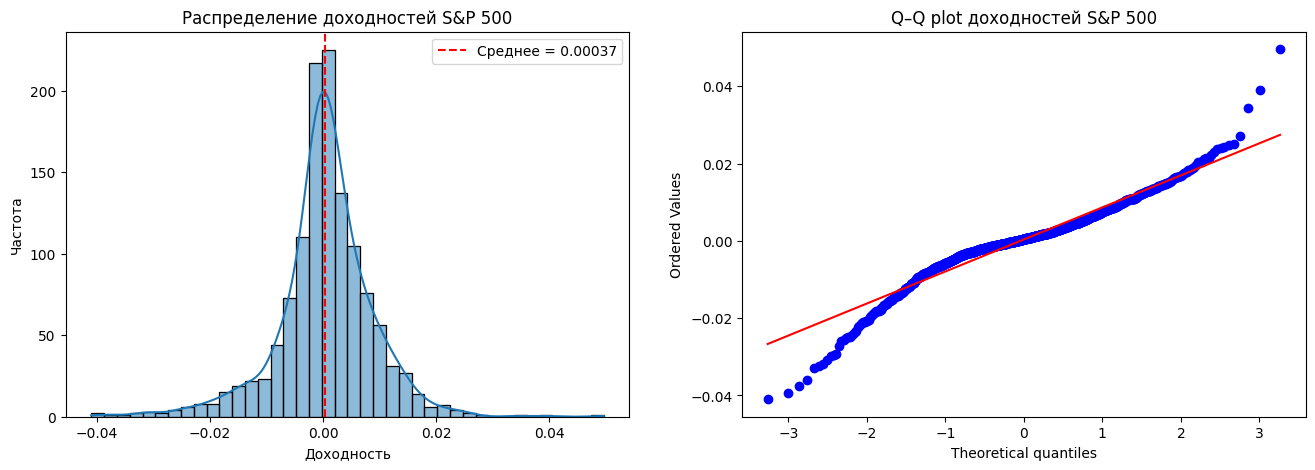

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(data, bins=40, kde=True, ax=axes[0])

axes[0].axvline(data.mean(), color='red', linestyle='--', label=f'Среднее = {round(data.mean(), 5)}')

axes[0].set_title('Распределение доходностей S&P 500')
axes[0].set_xlabel('Доходность')
axes[0].set_ylabel('Частота')
axes[0].legend()
stats.probplot(data, plot=axes[1])
axes[1].set_title('Q–Q plot доходностей S&P 500')

In [100]:
ttest_stat, ttest_pv = ttest_1samp(data, 0.00087)

In [101]:
print(f'T-test pvalue: {round(ttest_pv, 5)}')

T-test pvalue: 0.03745


In [102]:
print(f'Можем отвергнуть нулевую гипотезу о равенстве мат. ожиданий : {ttest_pv < 0.05}')

Можем отвергнуть нулевую гипотезу о равенстве мат. ожиданий : True


#### Вывод: Полученное значение p-value = 0.03745 меньше 0,05, поэтому у нас достаточно оснований, чтобы отвергнуть нулевую гипотезу

### Двухвыборочный t-тест
Проведем тест на наборе данных среднегодовой доходности банковского сектора в США и Китае с 1971 по 2019 год

In [117]:
df_gdp = pd.read_csv('gdp_growth.csv', delimiter=',')
df_gdp.head(3)

,Year,China,US
0,1971,1.995611,3.073314
1,1972,4.138085,3.968556
2,1973,4.642153,6.318245


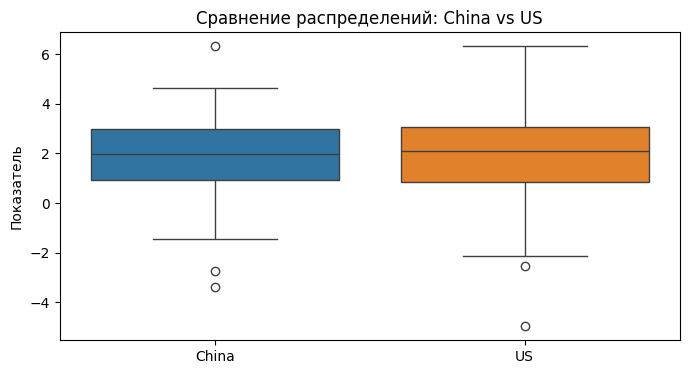

In [138]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=[china, us])
plt.xticks([0, 1], ['China', 'US'])
plt.title('Сравнение распределений: China vs US')
plt.ylabel('Показатель')
plt.show()

Для сравнения средних используется Welch t-test, так как он не требует предположения о равенстве дисперсий между выборками.

In [143]:
china = df_gdp['China']
us = df_gdp['US']
ttest_ind_pv = round(stats.ttest_ind(china, us, equal_var=False).pvalue, 5)

In [144]:
print(f'T-test pvalue: {ttest_ind_pv}')

T-test pvalue: 0.92737


In [141]:
print(f'Можем отвергнуть нулевую гипотезу о равенстве мат. ожиданий : {ttest_ind < 0.05}')

Можем отвергнуть нулевую гипотезу о равенстве мат. ожиданий : False


#### Вывод: Результаты двухвыборочного t-теста (Welch) не выявили статистически значимых различий между средними значениями показателя для China и US (p-value > 0.05). При этом визуальный анализ распределений показывает схожие медианы и разбросы, что согласуется с результатами теста.